In [2]:
import helper as hp

In [3]:
data = hp.minute_data_loading('EURUSD')

EURUSD BID Unfiltered Data Loaded


In [4]:
#calculate weekly variation
data["week"] = (data['Close'].shift(60*24*7) - data['Close']) * 100 / data['Close']
weekly_variation = data["week"].dropna().values

In [5]:
print(data.iloc[1300])

Gmt time    2019-01-01 21:40:00
Open                    1.14627
High                    1.14627
Low                     1.14627
Close                   1.14627
Volume                      0.0
week                        NaN
Name: 1300, dtype: object


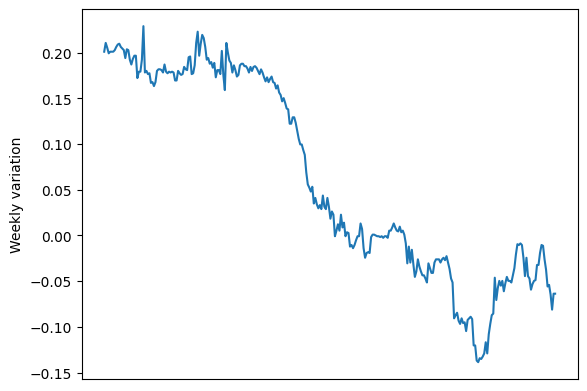

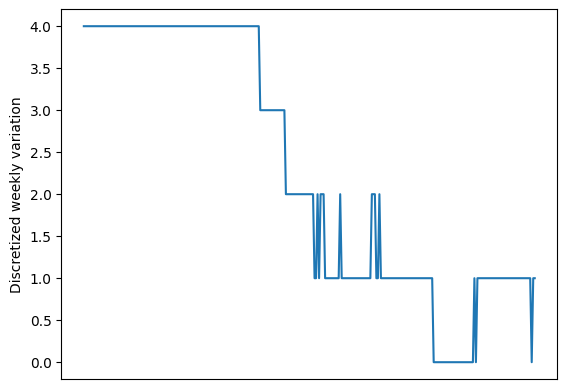

In [11]:
#plot weekly variation as line plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = data['Gmt time'].iloc[1300:1600]
continuous = weekly_variation[1300:1600]
plt.plot(continuous)
plt.gca().xaxis.set_visible(False)
plt.ylabel('Weekly variation')
plt.show()

#discretize the values into 5 classes
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
est.fit(continuous.reshape(-1, 1))
discretized = est.transform(continuous.reshape(-1, 1))

#plot the discretized values
plt.plot(dates, discretized)
plt.gca().xaxis.set_visible(False)
plt.ylabel('Discretized weekly variation')
plt.show()


In [7]:
print(data[1300])

KeyError: 1300